# Exercise: meteorological data

- We will analyse data taken from the World Meteorological Organisation (WMO).


- Data are written in json files with the following structure.

https://worldweather.wmo.int/en/json/WWIS_json_schema_v2.json


- Python has an in-built function to read json files.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Python program to read a json file
import json

# JSON file
f = open('291_en.json', "r") # Data for Quito

# Reading from file
data = json.loads(f.read())

print(type(data))

print(data["city"]["climate"]["climateMonth"][0])

# Closing file
f.close()

<class 'dict'>
{'month': 1, 'maxTemp': '21.2', 'minTemp': '9.8', 'meanTemp': None, 'maxTempF': '70.2', 'minTempF': '49.6', 'meanTempF': None, 'raindays': '13', 'rainfall': '82.5', 'climateFromMemDate': '2015-06-08'}


In [26]:
month   = []
minTemp = []
maxTemp = []
rainfall= []

for i in range (len(data["city"]["climate"]["climateMonth"])):
    month.append(data["city"]["climate"]["climateMonth"][i]["month"])
    minTemp.append(float(data["city"]["climate"]["climateMonth"][i]["minTemp"]))    
    maxTemp.append(float(data["city"]["climate"]["climateMonth"][i]["maxTemp"]))
    rainfall.append(float(data["city"]["climate"]["climateMonth"][i]["rainfall"]))

print(month)
print(minTemp)
print(maxTemp)
print(rainfall)


month = np.array(month)
minTemp = np.array(minTemp)
maxTemp = np.array(maxTemp)
rainfall = np.array(rainfall)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[9.8, 10.1, 10.1, 10.2, 10.1, 9.8, 9.4, 9.6, 9.4, 9.5, 9.6, 9.7]
[21.2, 21.0, 20.8, 20.9, 21.0, 21.1, 21.5, 22.2, 22.3, 21.8, 21.3, 21.3]
[82.5, 111.0, 146.6, 171.2, 105.5, 39.5, 21.5, 27.7, 68.9, 114.9, 108.5, 100.4]


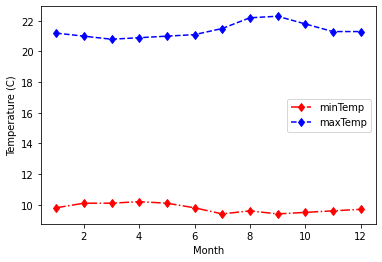

In [28]:
# And now we plot
fig, ax = plt.subplots()

ax.plot(month,minTemp,color='red', marker = "d", linestyle="-.", label="minTemp")
ax.plot(month,maxTemp,color='blue', marker = "d", linestyle="--", label="maxTemp")
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (C)')
ax.legend()
plt.show()

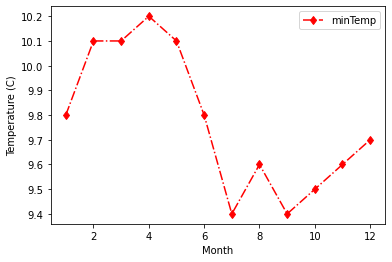

In [29]:
# And now we plot
fig, ax = plt.subplots()

ax.plot(month,minTemp,color='red', marker = "d", linestyle="-.", label="minTemp")
#ax.plot(month,maxTemp,color='blue', marker = "d", linestyle="--", label="maxTemp")
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (C)')
ax.legend()
plt.show()

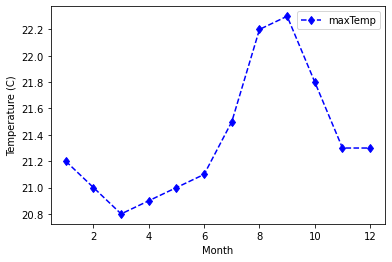

In [30]:
# And now we plot
fig, ax = plt.subplots()

#ax.plot(month,minTemp,color='red', marker = "d", linestyle="-.", label="minTemp")
ax.plot(month,maxTemp,color='blue', marker = "d", linestyle="--", label="maxTemp")
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (C)')
ax.legend()
plt.show()

# Rainfall

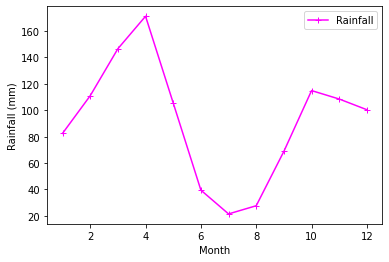

In [36]:
# And now we plot
fig, ax = plt.subplots()

ax.plot(month,rainfall,color='magenta', marker = "+", linestyle="-", label="Rainfall")
ax.set_xlabel('Month')
ax.set_ylabel('Rainfall (mm)')
ax.legend()
plt.show()

## Correlations?

### Min/Max Temperatures

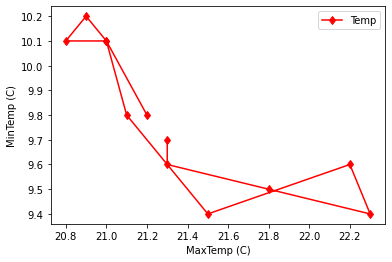

In [54]:
# And now we plot
fig, ax = plt.subplots()

ax.plot(maxTemp,minTemp,color='red', marker = "d", linestyle="-", label="Temp")

#ax.plot(sorted(maxTemp),minTemp2,color='blue', marker = "d", linestyle="-", label="Temp")

ax.set_xlabel('MaxTemp (C)')
ax.set_ylabel('MinTemp (C)')
ax.legend()
plt.show()

[ 9.8 10.1 10.1 10.2 10.1  9.8  9.4  9.6  9.4  9.5  9.6  9.7]
[21.2 21.  20.8 20.9 21.  21.1 21.5 22.2 22.3 21.8 21.3 21.3]
[10.1, 10.2, 10.1, 10.1, 9.8, 9.8, 9.6, 9.7, 9.4, 9.5, 9.6, 9.4]


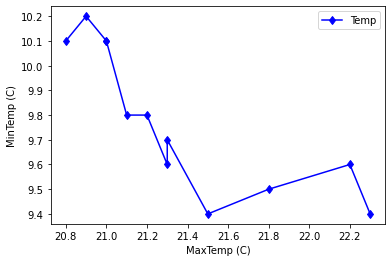

In [55]:
# And now we plot
fig, ax = plt.subplots()

minTemp2 = [x for _,x in sorted(zip(maxTemp,minTemp))]

print(minTemp)
print(maxTemp)
print(Z)

#ax.plot(maxTemp,minTemp,color='red', marker = "d", linestyle="-", label="Temp")

ax.plot(sorted(maxTemp),minTemp2,color='blue', marker = "d", linestyle="-", label="Temp")

ax.set_xlabel('MaxTemp (C)')
ax.set_ylabel('MinTemp (C)')
ax.legend()
plt.show()

In [57]:
# calculate Pearson's r correlation coeficient
from scipy.stats import spearmanr, pearsonr

p = spearmanr(sorted(maxTemp), minTemp2)

p1 = pearsonr(sorted(maxTemp), minTemp2)

print('Spearman values:', p)

print('Pearson r coefficients:', p1)

Spearman values: SpearmanrResult(correlation=-0.9289886789795498, pvalue=1.2611959140258825e-05)
Pearson r coefficients: (-0.813054932179885, 0.001301611635964842)


In [58]:
#define a function to fit to the data
def func(x, a, b):
    return a*x + b

A=np.polyfit(maxTemp, minTemp, 1)
print(A)

[-0.4764268  19.95465261]


[ 9.8 10.1 10.1 10.2 10.1  9.8  9.4  9.6  9.4  9.5  9.6  9.7]
[21.2 21.  20.8 20.9 21.  21.1 21.5 22.2 22.3 21.8 21.3 21.3]
[10.1, 10.2, 10.1, 10.1, 9.8, 9.8, 9.6, 9.7, 9.4, 9.5, 9.6, 9.4]


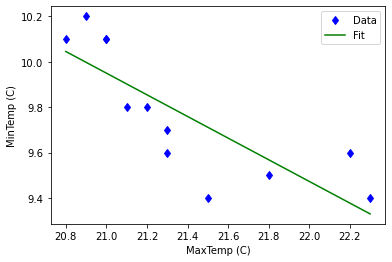

In [68]:
# And now we plot
fig, ax = plt.subplots()

minTemp2 = [x for _,x in sorted(zip(maxTemp,minTemp))]

print(minTemp)
print(maxTemp)
print(Z)
line = np.array(sorted(maxTemp))

#ax.plot(maxTemp,minTemp,color='red', marker = "d", linestyle="-", label="Temp")

ax.plot(sorted(maxTemp),minTemp2,color='blue', marker = "d", linestyle=" ", label="Data")
ax.plot(sorted(maxTemp),func(line,A[0],A[1]),color='green', linestyle="-", label="Fit")

ax.set_xlabel('MaxTemp (C)')
ax.set_ylabel('MinTemp (C)')
ax.legend()
plt.show()

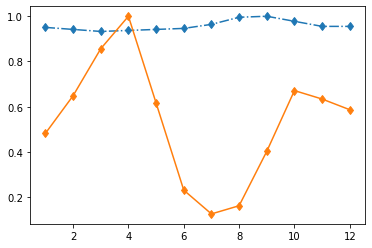

In [29]:
plt.plot(np.array(month),np.array(maxTemp)/np.max(maxTemp), marker = 'd', linestyle = '-.')
plt.plot(np.array(month),np.array(rainfall)/np.max(rainfall), marker = 'd', linestyle = '-')

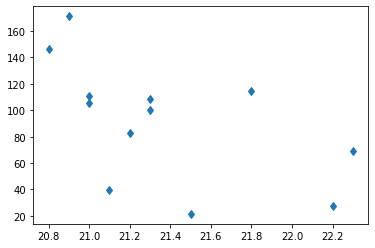

In [30]:
plt.plot(np.array(maxTemp),np.array(rainfall), marker = 'd', linestyle = '')

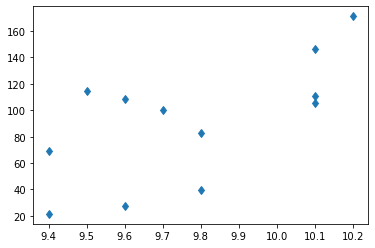

In [31]:
plt.plot(np.array(minTemp),np.array(rainfall), marker = 'd', linestyle = '')

In [32]:
# calculate Pearson's r correlation coeficient
from scipy.stats import spearmanr, pearsonr

p = spearmanr(np.array(minTemp), np.array(rainfall))

p1 = pearsonr(np.array(minTemp), np.array(rainfall))

print('Spearman values:', p)

print('Pearson r coefficients:', p1)

Spearman values: SpearmanrResult(correlation=0.6053561964006321, pvalue=0.036995534708780774)
Pearson r coefficients: (0.6635078693465295, 0.018651930806838496)


In [33]:
#define a function to fit to the data
def func(x, a, b):
    return a*x + b

In [34]:
A=np.polyfit(minTemp, rainfall, 1)
print(A)

[ 105.100271   -935.83848238]


<class 'numpy.ndarray'>


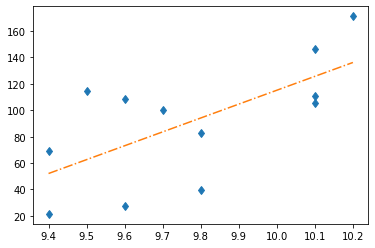

In [35]:
plt.plot(np.array(minTemp),np.array(rainfall), marker = 'd', linestyle = '')

line = np.array(sorted(minTemp))

print(type(line))

plt.plot(line,func(line,A[0],A[1]), linestyle = '-.')